<a href="https://colab.research.google.com/github/DanielCastilloRdz/Codigo_machine_learning/blob/main/proyecto_AAR_v18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<style>
  .titulo-principal {
    color: #2C3E50;       
    font-size: 2.5em;
    margin-bottom: 0.5em;
  }
  .subtitulo {
    color: #34495E;       
    font-size: 2em;
    margin-top: 1.5em;
    margin-bottom: 0.3em;
  }
  .encabezado-seccion {
    color: #1ABC9C;       
    font-size: 1.5em;
    margin-top: 1em;
    margin-bottom: 0.2em;
  }
  .subencabezado {
    color: #E67E22;       
    font-size: 1.25em;
    margin-top: 0.8em;
    margin-bottom: 0.15em;
  }
</style>


<h1 class="titulo-principal">Proyecto: Administración Actuarial del Riesgo</h1>

<h2 class="subtitulo">Consultora Toyber McGardners Group</h2>

- César Emiliano Garduño Gutiérrez
- Maximiliano Gómez Mendoza
- Daniel Arturo Castillo
- Diego Ojeda Jiménez



In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import re
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer


<h2 class="subtitulo">1, 2. Calidad de los datos & Análisis Exploratorio de los datos</h2>


<h3 class="encabezado-seccion">Comprobamos las dimensiones de la calidad de los datos, con el objetivo de que la información sea lo más limpia y concreta para el análisis, además de detectar valores extremos si es que existen en dichas variables y determinar el número de valores incorrectos en ellas.</h3>


<h3 class="encabezado-seccion">De igual manera, realizamos un análisis exploratorio de los datos realizando estadísticas descriptivas por variable visualizándolas como salidas en la consola</h3>

In [ ]:
df = pd.read_csv("base.csv")
datos_copia = df.copy()
df

,age,sex,bmi,children,smoker,region,charges,nivel_socioeconomico,salario_mensual_usd,nivel_educativo,tipo_empleo,visitas_medicas_ultimo_anio
0,69,unknown,24.522333,NaN,no,northwest,-1000,Alto,error,posgrado,estudiante,1
1,32,female,22.047802,4,no,northwest,12901.59623,Bajo,3903.133182,preparatoria,empleado,1
2,89,female,28.993167,1,no,northwest,11134.70666,Medio,3948.696113,secundaria,freelance,2
3,78,female,37.285143,1,sometimes,northwest,7574.292284,Bajo,2957.630834,primaria,freelance,3
4,38,male,28.511725,2,no,southeast,12234.58133,Bajo,6114.139944,universidad,freelance,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,56,unknown,32.546962,2,no,southeast,14970.63255,Medio,4093.322612,secundaria,desempleado,1
1996,22,male,23.507978,NaN,yes,southwest,12393.45664,Bajo,4168.47754,primaria,estudiante,3
1997,82,female,29.676648,1,no,northwest,17640.36003,Bajo,3953.165562,universidad,desempleado,1
1998,30,unknown,31.146217,1,no,northwest,8200.748489,Alto,1613.01309,secundaria,empleado,2


In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
print("Variables con más NaN:\n", missing.head(10))

Variables con más NaN:
 smoker                         194
nivel_socioeconomico           119
children                       118
region                          94
tipo_empleo                     94
sex                             90
nivel_educativo                 64
salario_mensual_usd             16
charges                         10
visitas_medicas_ultimo_anio      4
dtype: int64


In [ ]:
num_cols = [c for c in top_cols if pd.api.types.is_numeric_dtype(df[c])]
cat_cols = [c for c in top_cols if not pd.api.types.is_numeric_dtype(df[c])]


In [ ]:
imp_num = SimpleImputer(strategy='median')
imp_cat = SimpleImputer(strategy='most_frequent')

In [ ]:
k = 4
top_cols = missing.head(k).index.tolist()

In [ ]:
imp_num = SimpleImputer(strategy='median')
imp_cat = SimpleImputer(strategy='most_frequent')

In [ ]:
if num_cols:
    df[num_cols] = imp_num.fit_transform(df[num_cols])
if cat_cols:
    df[cat_cols] = imp_cat.fit_transform(df[cat_cols])

In [ ]:
print("Tras imputar:\n", df[top_cols].isna().sum())

Tras imputar:
 smoker                  0
nivel_socioeconomico    0
children                0
region                  0
dtype: int64


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,nivel_socioeconomico,salario_mensual_usd,nivel_educativo,tipo_empleo,visitas_medicas_ultimo_anio
0,69,unknown,24.522333,2,no,northwest,-1000,Alto,error,posgrado,estudiante,1
1,32,female,22.047802,4,no,northwest,12901.59623,Bajo,3903.133182,preparatoria,empleado,1
2,89,female,28.993167,1,no,northwest,11134.70666,Medio,3948.696113,secundaria,freelance,2
3,78,female,37.285143,1,sometimes,northwest,7574.292284,Bajo,2957.630834,primaria,freelance,3
4,38,male,28.511725,2,no,southeast,12234.58133,Bajo,6114.139944,universidad,freelance,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,56,unknown,32.546962,2,no,southeast,14970.63255,Medio,4093.322612,secundaria,desempleado,1
1996,22,male,23.507978,2,yes,southwest,12393.45664,Bajo,4168.47754,primaria,estudiante,3
1997,82,female,29.676648,1,no,northwest,17640.36003,Bajo,3953.165562,universidad,desempleado,1
1998,30,unknown,31.146217,1,no,northwest,8200.748489,Alto,1613.01309,secundaria,empleado,2


In [ ]:
nan_por_col = df.isnull().sum()
print(nan_por_col)

age                             3
sex                            90
bmi                             3
children                        0
smoker                          0
region                          0
charges                        10
nivel_socioeconomico            0
salario_mensual_usd            16
nivel_educativo                64
tipo_empleo                    94
visitas_medicas_ultimo_anio     4
dtype: int64


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'nivel_socioeconomico', 'salario_mensual_usd', 'nivel_educativo',
       'tipo_empleo', 'visitas_medicas_ultimo_anio'],
      dtype='object')

In [ ]:
datos= df
datos

,age,sex,bmi,children,smoker,region,charges,nivel_socioeconomico,salario_mensual_usd,nivel_educativo,tipo_empleo,visitas_medicas_ultimo_anio
0,69,unknown,24.522333,2,no,northwest,-1000,Alto,error,posgrado,estudiante,1
1,32,female,22.047802,4,no,northwest,12901.59623,Bajo,3903.133182,preparatoria,empleado,1
2,89,female,28.993167,1,no,northwest,11134.70666,Medio,3948.696113,secundaria,freelance,2
3,78,female,37.285143,1,sometimes,northwest,7574.292284,Bajo,2957.630834,primaria,freelance,3
4,38,male,28.511725,2,no,southeast,12234.58133,Bajo,6114.139944,universidad,freelance,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,56,unknown,32.546962,2,no,southeast,14970.63255,Medio,4093.322612,secundaria,desempleado,1
1996,22,male,23.507978,2,yes,southwest,12393.45664,Bajo,4168.47754,primaria,estudiante,3
1997,82,female,29.676648,1,no,northwest,17640.36003,Bajo,3953.165562,universidad,desempleado,1
1998,30,unknown,31.146217,1,no,northwest,8200.748489,Alto,1613.01309,secundaria,empleado,2


<h4 class="subencabezado">Edad</h4>


In [ ]:
datos["age"].value_counts(dropna=False)

age
79       44
50       39
19       36
77       35
25       35
         ..
old       1
110       1
150       1
300       1
young     1
Name: count, Length: 90, dtype: int64

In [ ]:
datos['age'] = pd.to_numeric(datos['age'], errors='coerce')
datos["age"].value_counts(dropna=False)
datos['age'].isna().sum()
datos = datos[datos['age'] <= 95]
datos = datos[datos['age'] >= 18]

datos_copia=datos



In [ ]:
datos["age"].describe()

count    1980.000000
mean       52.714141
std        20.833057
min        18.000000
25%        34.750000
50%        52.000000
75%        71.000000
max        89.000000
Name: age, dtype: float64

In [ ]:
datos

,age,sex,bmi,children,smoker,region,charges,nivel_socioeconomico,salario_mensual_usd,nivel_educativo,tipo_empleo,visitas_medicas_ultimo_anio
0,69.0,unknown,24.522333,2,no,northwest,-1000,Alto,error,posgrado,estudiante,1
1,32.0,female,22.047802,4,no,northwest,12901.59623,Bajo,3903.133182,preparatoria,empleado,1
2,89.0,female,28.993167,1,no,northwest,11134.70666,Medio,3948.696113,secundaria,freelance,2
3,78.0,female,37.285143,1,sometimes,northwest,7574.292284,Bajo,2957.630834,primaria,freelance,3
4,38.0,male,28.511725,2,no,southeast,12234.58133,Bajo,6114.139944,universidad,freelance,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,56.0,unknown,32.546962,2,no,southeast,14970.63255,Medio,4093.322612,secundaria,desempleado,1
1996,22.0,male,23.507978,2,yes,southwest,12393.45664,Bajo,4168.47754,primaria,estudiante,3
1997,82.0,female,29.676648,1,no,northwest,17640.36003,Bajo,3953.165562,universidad,desempleado,1
1998,30.0,unknown,31.146217,1,no,northwest,8200.748489,Alto,1613.01309,secundaria,empleado,2


<h4 class="subencabezado">Sexo</h4>


In [ ]:
datos["sex"].value_counts(dropna=False)

sex
female     903
male       853
unknown     93
NaN         89
123         42
Name: count, dtype: int64

In [ ]:
print("Nas ",datos["sex"].isna().sum())

datos['sex'].replace(("123",'unknown'), np.nan, inplace=True)

datos = datos[datos['sex'].notna()]

datos.reset_index(drop=True, inplace=True)

datos["sex"].value_counts(dropna=False)

print("Se eliminaron ",datos_copia['sex'].shape[0]-datos['sex'].shape[0], " datos de la columna sex")

Nas  89
Se eliminaron  224  datos de la columna sex


C:\Users\chopp\AppData\Local\Temp\ipykernel_3488\1980948157.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['sex'].replace(("123",'unknown'), np.nan, inplace=True)


In [ ]:
datos['sex'].value_counts(dropna=False)

sex
female    903
male      853
Name: count, dtype: int64

In [ ]:
datos

,age,sex,bmi,children,smoker,region,charges,nivel_socioeconomico,salario_mensual_usd,nivel_educativo,tipo_empleo,visitas_medicas_ultimo_anio
0,32.0,female,22.047802,4,no,northwest,12901.59623,Bajo,3903.133182,preparatoria,empleado,1
1,89.0,female,28.993167,1,no,northwest,11134.70666,Medio,3948.696113,secundaria,freelance,2
2,78.0,female,37.285143,1,sometimes,northwest,7574.292284,Bajo,2957.630834,primaria,freelance,3
3,38.0,male,28.511725,2,no,southeast,12234.58133,Bajo,6114.139944,universidad,freelance,1
4,41.0,female,35.850807,2,yes,northeast,15086.64651,Alto,5560.738957,preparatoria,freelance,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1751,27.0,female,23.322408,0,no,southwest,14009.43597,Medio,2230.192479,primaria,Empleado,2
1752,75.0,male,27.514099,0,no,northeast,18200.1336,B,4938.217582,secundaria,freelance,3
1753,22.0,male,23.507978,2,yes,southwest,12393.45664,Bajo,4168.47754,primaria,estudiante,3
1754,82.0,female,29.676648,1,no,northwest,17640.36003,Bajo,3953.165562,universidad,desempleado,1


<h4 class="subencabezado">BMI</h4>


In [ ]:

print(datos["bmi"].value_counts(dropna=False))
print("Nas ",datos["bmi"].isna().sum())
datos = datos[datos['bmi'] <= 60]
datos = datos[datos['bmi'] > 10]

datos = datos.dropna(subset=['bmi'])


print("Se eliminaron ",datos_copia['bmi'].shape[0]-datos['bmi'].shape[0], " datos de la columna bmi")

datos_copia=datos

bmi
NaN          3
27.264173    1
24.013554    1
30.626940    1
32.581003    1
            ..
25.521378    1
25.650073    1
27.162356    1
24.853199    1
25.390688    1
Name: count, Length: 1754, dtype: int64
Nas  3
Se eliminaron  233  datos de la columna bmi


In [ ]:
datos['bmi'].describe()

count    1747.000000
mean       29.985436
std         6.023623
min        10.222482
25%        25.937506
50%        30.043771
75%        34.021808
max        60.000000
Name: bmi, dtype: float64

<h4 class="subencabezado">Fumador</h4>


In [ ]:
datos["smoker"].value_counts()

smoker
no              1278
yes              363
sometimes         57
occasionally      49
Name: count, dtype: int64

In [ ]:
#solo cambiamos "occasionally" a "sometimes"
datos['smoker'] = datos['smoker'].replace('occasionally', 'sometimes')



In [ ]:
datos["smoker"].value_counts()

smoker
no           1278
yes           363
sometimes     106
Name: count, dtype: int64

<h4 class="subencabezado">Charges</h4>


In [ ]:
datos["charges"].value_counts()

charges
-1000          7
300000         4
error          4
unknown        4
21720.05117    1
              ..
6758.485991    1
13470.88235    1
16701.66711    1
15755.63302    1
9261.074478    1
Name: count, Length: 1722, dtype: int64

In [ ]:
print("NA's ",datos["charges"].isna().sum())

datos['charges'] = pd.to_numeric(datos['charges'], errors='coerce')
datos = datos.dropna(subset=['charges'])


datos["charges"].nlargest(10)
datos = datos[datos['charges'] != 300000]
#borramos los 3  outliers de 300,000

datos = datos[datos['charges'] >= 0]

print("Se eliminaron ",datos_copia['charges'].shape[0]-datos['charges'].shape[0], " datos de la columna charges")

datos["charges"].value_counts(dropna=False)

datos_copia=datos


NA's  10
Se eliminaron  41  datos de la columna charges


In [ ]:
datos["charges"].value_counts()

charges
11875.402300    1
12901.596230    1
11134.706660    1
7574.292284     1
12234.581330    1
               ..
14409.671520    1
10255.974890    1
8036.704923     1
15655.425650    1
24992.246430    1
Name: count, Length: 1706, dtype: int64

<h4 class="subencabezado">Salario mensual</h4>


In [ ]:
datos["salario_mensual_usd"].value_counts()


salario_mensual_usd
error            4
five thousand    3
1000000          3
-500             2
3821.528213      1
                ..
5243.712221      1
3481.142917      1
3925.680973      1
6149.822276      1
6114.139944      1
Name: count, Length: 1686, dtype: int64

In [ ]:
print("Nas ",datos["salario_mensual_usd"].isna().sum())

datos['salario_mensual_usd'] = pd.to_numeric(datos['salario_mensual_usd'], errors='coerce')
datos["salario_mensual_usd"].value_counts(dropna=False)

datos = datos[datos['salario_mensual_usd'] >= 0]
media_salario = datos["salario_mensual_usd"].mean()
datos["salario_mensual_usd"].fillna(media_salario, inplace=True)

datos['salario_mensual_usd'].nlargest(10)

# borramos las 5 entradas con un millon de salario para que no altere la prediccion:
datos = datos[datos['salario_mensual_usd'] != 1000000]

print("Se eliminaron ",datos_copia['salario_mensual_usd'].shape[0]-datos['salario_mensual_usd'].shape[0], " datos de la columna salario_mensual_usd")

datos_copia=datos

Nas  12
Se eliminaron  26  datos de la columna salario_mensual_usd


C:\Users\chopp\AppData\Local\Temp\ipykernel_3488\1282236783.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos["salario_mensual_usd"].fillna(media_salario, inplace=True)
C:\Users\chopp\AppData\Local\Temp\ipykernel_3488\1282236783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["salario_mensual_usd"].fillna(media_salario, inpla

In [ ]:
datos["salario_mensual_usd"].value_counts()


salario_mensual_usd
2522.444297    1
6149.822276    1
3925.680973    1
3481.142917    1
5243.712221    1
              ..
5560.738957    1
6114.139944    1
2957.630834    1
3948.696113    1
3903.133182    1
Name: count, Length: 1680, dtype: int64

<h4 class="subencabezado">Region</h4>


In [ ]:
datos["region"].value_counts()

region
southeast    459
northeast    383
northwest    349
southwest    339
central       91
123           59
Name: count, dtype: int64

In [ ]:
print("Nas ",datos["region"].isna().sum())

datos['region'].replace("123", np.nan, inplace=True)

datos = datos.dropna(subset=['region'])

datos.reset_index(drop=True, inplace=True)

print("Se eliminaron ",datos_copia['region'].shape[0]-datos['region'].shape[0], " datos de la columna region")

print(datos["region"].value_counts(dropna=False))

datos_copia=datos

Nas  0
Se eliminaron  59  datos de la columna region
region
southeast    459
northeast    383
northwest    349
southwest    339
central       91
Name: count, dtype: int64


C:\Users\chopp\AppData\Local\Temp\ipykernel_3488\2409966492.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['region'].replace("123", np.nan, inplace=True)


In [ ]:
datos["region"].value_counts()

region
southeast    459
northeast    383
northwest    349
southwest    339
central       91
Name: count, dtype: int64

<h4 class="subencabezado">Tipo de empleo</h4>


In [ ]:
datos["tipo_empleo"].value_counts()


tipo_empleo
empleado             402
freelance            318
desempleado          254
estudiante           238
jubilado             184
Empleado              59
empleado informal     50
unknown               45
Name: count, dtype: int64

In [ ]:
print("Nas ",datos["tipo_empleo"].isna().sum())

datos['tipo_empleo'].replace("Empleado", "empleado", inplace=True)
datos['tipo_empleo'].replace("estudiante", "desempleado", inplace=True)
datos['tipo_empleo'].replace("unknown", np.nan, inplace=True)
datos["tipo_empleo"].value_counts()

datos = datos.dropna(subset=['tipo_empleo'])

print("Se eliminaron ",datos_copia['tipo_empleo'].shape[0]-datos['tipo_empleo'].shape[0], " datos de la columna tipo_empleo")
datos_copia=datos

Nas  71
Se eliminaron  116  datos de la columna tipo_empleo


C:\Users\chopp\AppData\Local\Temp\ipykernel_3488\176429598.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['tipo_empleo'].replace("Empleado", "empleado", inplace=True)
C:\Users\chopp\AppData\Local\Temp\ipykernel_3488\176429598.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [ ]:
datos["tipo_empleo"].value_counts()


tipo_empleo
desempleado          492
empleado             461
freelance            318
jubilado             184
empleado informal     50
Name: count, dtype: int64

<h4 class="subencabezado">Visitas médicas en el último año</h4>


In [ ]:
datos["visitas_medicas_ultimo_anio"].value_counts()




visitas_medicas_ultimo_anio
2        441
1        391
3        257
0        209
4        114
5         54
6         16
7          6
lots       1
25         1
-5         1
99         1
300        1
888        1
-1         1
1000       1
           1
mucho      1
8          1
zero       1
many       1
1x         1
Name: count, dtype: int64

In [ ]:
print("Nas ",datos["visitas_medicas_ultimo_anio"].isna().sum())

datos['visitas_medicas_ultimo_anio'] = pd.to_numeric(datos['visitas_medicas_ultimo_anio'], errors='coerce')

datos['visitas_medicas_ultimo_anio'].replace("zero", "0", inplace=True)

datos = datos[datos['visitas_medicas_ultimo_anio'] >= 0]
datos = datos[datos['visitas_medicas_ultimo_anio'] <= 10]


datos = datos.dropna(subset=['visitas_medicas_ultimo_anio'])

print("Se eliminaron ",datos_copia['visitas_medicas_ultimo_anio'].shape[0]-datos['visitas_medicas_ultimo_anio'].shape[0], " datos de la columna visitas_medicas_ultimo_anio")

Nas  3
Se eliminaron  16  datos de la columna visitas_medicas_ultimo_anio


C:\Users\chopp\AppData\Local\Temp\ipykernel_3488\3571198068.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['visitas_medicas_ultimo_anio'].replace("zero", "0", inplace=True)


In [ ]:
datos["visitas_medicas_ultimo_anio"].value_counts()

visitas_medicas_ultimo_anio
2.0    441
1.0    391
3.0    257
0.0    209
4.0    114
5.0     54
6.0     16
7.0      6
8.0      1
Name: count, dtype: int64

<h4 class="subencabezado">Número de hijos</h4>

In [ ]:
datos["children"].value_counts()

children
2        433
1        299
4        252
0        222
3        209
5         49
three     25
Name: count, dtype: int64

In [ ]:
datos_copia = datos.copy()

texto_a_numero = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,
    'ten': 10
}

datos["children"] = datos["children"].astype(str).str.lower().str.strip().str.replace(',', '', regex=False)

datos["children"] = datos["children"].replace(texto_a_numero)

datos["children"] = pd.to_numeric(datos["children"], errors='coerce')

moda_children = datos["children"].mode()[0]
datos["children"].fillna(moda_children, inplace=True)

datos = datos[datos["children"] >= 0]

datos.reset_index(drop=True, inplace=True)

print("Nulos después de imputar:", datos["children"].isna().sum())
print("Valores únicos después de limpiar:\n", datos["children"].value_counts().sort_index())
print("Filas eliminadas por valores negativos:", datos_copia.shape[0] - datos.shape[0])

Nulos después de imputar: 0
Valores únicos después de limpiar:
 children
0    222
1    299
2    433
3    234
4    252
5     49
Name: count, dtype: int64
Filas eliminadas por valores negativos: 0


C:\Users\chopp\AppData\Local\Temp\ipykernel_3488\972391956.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos["children"].fillna(moda_children, inplace=True)


<h4 class="subencabezado">Nivel educativo</h4>

In [ ]:
datos["nivel_educativo"].value_counts()

nivel_educativo
universidad     391
preparatoria    382
secundaria      289
primaria        213
posgrado         75
none             32
Primaria         27
PRIMARIA         23
???              13
Name: count, dtype: int64

In [ ]:
datos["nivel_educativo"] = datos["nivel_educativo"].astype(str).str.lower().str.strip()


datos["nivel_educativo"] = datos["nivel_educativo"].replace("nan", np.nan)
correcciones = {
    'primario': 'primaria',
    'prepa': 'preparatoria',
    'secundario': 'secundaria',
    'universida': 'universidad',
    'none': np.nan,
    '???': np.nan
}

datos["nivel_educativo"] = datos["nivel_educativo"].replace(correcciones)
datos["nivel_educativo"] = datos["nivel_educativo"].astype("category")

moda_edu = datos["nivel_educativo"].mode()[0]
datos["nivel_educativo"].fillna(moda_edu, inplace=True)

print("\nValores únicos después de limpiar e imputar:")
print(datos["nivel_educativo"].value_counts(dropna=False))
print("\nCantidad de valores faltantes:", datos["nivel_educativo"].isna().sum())


Valores únicos después de limpiar e imputar:
nivel_educativo
universidad     480
preparatoria    382
secundaria      289
primaria        263
posgrado         75
Name: count, dtype: int64

Cantidad de valores faltantes: 0


C:\Users\chopp\AppData\Local\Temp\ipykernel_3488\3680838057.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos["nivel_educativo"].fillna(moda_edu, inplace=True)


<h4 class="subencabezado">Nivel socioeconomico</h4>

In [ ]:
datos["nivel_socioeconomico"].value_counts()


nivel_socioeconomico
Medio          551
Alto           339
Bajo           299
B               84
Desconocido     78
M               73
A               65
Name: count, dtype: int64

In [ ]:
datos["nivel_socioeconomico"] = datos["nivel_socioeconomico"].astype(str).str.lower().str.strip()
correcciones = {
    'alto': 'alto',
    'a': 'alto',
    'medio': 'medio',
    'm': 'medio',
    'bajo': 'bajo',
    'b': 'bajo',
    'desconocido': np.nan
}

datos["nivel_socioeconomico"] = datos["nivel_socioeconomico"].replace(correcciones)

datos["nivel_socioeconomico"] = datos["nivel_socioeconomico"].astype('category')
datos["nivel_socioeconomico"] = datos["nivel_socioeconomico"].replace("nan", np.nan)

print("Valores después de limpiar:")
print(datos["nivel_socioeconomico"].value_counts(dropna=False))


Valores después de limpiar:
nivel_socioeconomico
medio    624
alto     404
bajo     383
NaN       78
Name: count, dtype: int64


In [ ]:
datos = datos[datos["nivel_socioeconomico"].notna()]
datos["nivel_socioeconomico"].value_counts()

nivel_socioeconomico
medio    624
alto     404
bajo     383
Name: count, dtype: int64

In [ ]:
datos

,age,sex,bmi,children,smoker,region,charges,nivel_socioeconomico,salario_mensual_usd,nivel_educativo,tipo_empleo,visitas_medicas_ultimo_anio
0,32.0,female,22.047802,4,no,northwest,12901.596230,bajo,3903.133182,preparatoria,empleado,1.0
1,89.0,female,28.993167,1,no,northwest,11134.706660,medio,3948.696113,secundaria,freelance,2.0
2,78.0,female,37.285143,1,sometimes,northwest,7574.292284,bajo,2957.630834,primaria,freelance,3.0
3,38.0,male,28.511725,2,no,southeast,12234.581330,bajo,6114.139944,universidad,freelance,1.0
4,41.0,female,35.850807,2,yes,northeast,15086.646510,alto,5560.738957,preparatoria,freelance,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1484,27.0,female,23.322408,0,no,southwest,14009.435970,medio,2230.192479,primaria,empleado,2.0
1485,75.0,male,27.514099,0,no,northeast,18200.133600,bajo,4938.217582,secundaria,freelance,3.0
1486,22.0,male,23.507978,2,yes,southwest,12393.456640,bajo,4168.477540,primaria,desempleado,3.0
1487,82.0,female,29.676648,1,no,northwest,17640.360030,bajo,3953.165562,universidad,desempleado,1.0


In [ ]:
datos_limpios = datos.copy()
datos_limpios.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'nivel_socioeconomico', 'salario_mensual_usd', 'nivel_educativo',
       'tipo_empleo', 'visitas_medicas_ultimo_anio'],
      dtype='object')

In [ ]:
Q1 = datos_limpios.salario_mensual_usd.quantile(0.25)
Q3 = datos_limpios.salario_mensual_usd.quantile(0.75)
IQR = Q3 - Q1
datos_limpios = datos_limpios.drop(datos_limpios.loc[datos_limpios['salario_mensual_usd'] > (Q3 + 1.5 * IQR)].index)
datos_limpios = datos_limpios.drop(datos_limpios.loc[datos_limpios['salario_mensual_usd'] < (Q1 - 1.5 * IQR)].index)
datos_limpios

,age,sex,bmi,children,smoker,region,charges,nivel_socioeconomico,salario_mensual_usd,nivel_educativo,tipo_empleo,visitas_medicas_ultimo_anio
0,32.0,female,22.047802,4,no,northwest,12901.596230,bajo,3903.133182,preparatoria,empleado,1.0
1,89.0,female,28.993167,1,no,northwest,11134.706660,medio,3948.696113,secundaria,freelance,2.0
2,78.0,female,37.285143,1,sometimes,northwest,7574.292284,bajo,2957.630834,primaria,freelance,3.0
3,38.0,male,28.511725,2,no,southeast,12234.581330,bajo,6114.139944,universidad,freelance,1.0
4,41.0,female,35.850807,2,yes,northeast,15086.646510,alto,5560.738957,preparatoria,freelance,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1484,27.0,female,23.322408,0,no,southwest,14009.435970,medio,2230.192479,primaria,empleado,2.0
1485,75.0,male,27.514099,0,no,northeast,18200.133600,bajo,4938.217582,secundaria,freelance,3.0
1486,22.0,male,23.507978,2,yes,southwest,12393.456640,bajo,4168.477540,primaria,desempleado,3.0
1487,82.0,female,29.676648,1,no,northwest,17640.360030,bajo,3953.165562,universidad,desempleado,1.0


In [ ]:
datos_limpios['charges'].describe()

count     1403.000000
mean     13241.840333
std       4895.007491
min        249.868542
25%       9739.244856
50%      13194.472580
75%      16592.054605
max      29428.618570
Name: charges, dtype: float64

In [ ]:
tiene_nan = datos_limpios.isnull().values.any()
print("¿Hay valores NaN en el DataFrame?", tiene_nan)

¿Hay valores NaN en el DataFrame? False


In [ ]:
missing = datos_limpios.isna().sum().sort_values(ascending=False)
print("Variables con más NaN:\n", missing.head(10))

Variables con más NaN:
 age                     0
sex                     0
bmi                     0
children                0
smoker                  0
region                  0
charges                 0
nivel_socioeconomico    0
salario_mensual_usd     0
nivel_educativo         0
dtype: int64


In [ ]:
datos_limpios

,age,sex,bmi,children,smoker,region,charges,nivel_socioeconomico,salario_mensual_usd,nivel_educativo,...,age_squared,log_charges,log_bmi,log_salario_anual,bmi_x_age,bmi_x_smoker,smoker_x_visitas,charges_over_income,visitas_per_child,salario_por_bmi
0,32.0,female,22.047802,4,no,northwest,12901.596230,bajo,3903.133182,preparatoria,...,1024.0,9.465106,3.093213,10.754442,705.529654,0.000000,0.0,0.275454,0.200000,2124.365904
1,89.0,female,28.993167,1,no,northwest,11134.706660,medio,3948.696113,secundaria,...,7921.0,9.317822,3.367060,10.766047,2580.391839,0.000000,0.0,0.234987,1.000000,1634.328316
2,78.0,female,37.285143,1,sometimes,northwest,7574.292284,bajo,2957.630834,primaria,...,6084.0,8.932515,3.618595,10.477050,2908.241180,18.642572,1.5,0.213411,1.500000,951.895764
3,38.0,male,28.511725,2,no,southeast,12234.581330,bajo,6114.139944,universidad,...,1444.0,9.412022,3.350315,11.203266,1083.445535,0.000000,0.0,0.166753,0.333333,2573.316078
4,41.0,female,35.850807,2,yes,northeast,15086.646510,alto,5560.738957,preparatoria,...,1681.0,9.621565,3.579366,11.108393,1469.883092,35.850807,2.0,0.226089,0.666667,1861.293310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,27.0,female,23.322408,0,no,southwest,14009.435970,medio,2230.192479,primaria,...,729.0,9.547486,3.149415,10.194750,629.705004,0.000000,0.0,0.523476,2.000000,1147.493443
1485,75.0,male,27.514099,0,no,northeast,18200.133600,bajo,4938.217582,secundaria,...,5625.0,9.809184,3.314699,10.989666,2063.557397,0.000000,0.0,0.307131,3.000000,2153.754400
1486,22.0,male,23.507978,2,yes,southwest,12393.456640,bajo,4168.477540,primaria,...,484.0,9.424924,3.157340,10.820213,517.175525,23.507978,3.0,0.247761,1.000000,2127.861850
1487,82.0,female,29.676648,1,no,northwest,17640.360030,bajo,3953.165562,universidad,...,6724.0,9.777945,3.390360,10.767179,2433.485139,0.000000,0.0,0.371861,0.500000,1598.495446


In [ ]:
datos_limpios['charges'] = pd.to_numeric(datos_limpios['charges'], errors='coerce')


In [ ]:
# Ejemplo con 3 clases
datos_limpios['charges_cat'] = pd.qcut(datos_limpios['charges'], q=3, labels=['bajo', 'medio', 'alto'])


In [ ]:
datos_limpios.to_csv("base_limpia1.csv", index=False)

<Axes: >

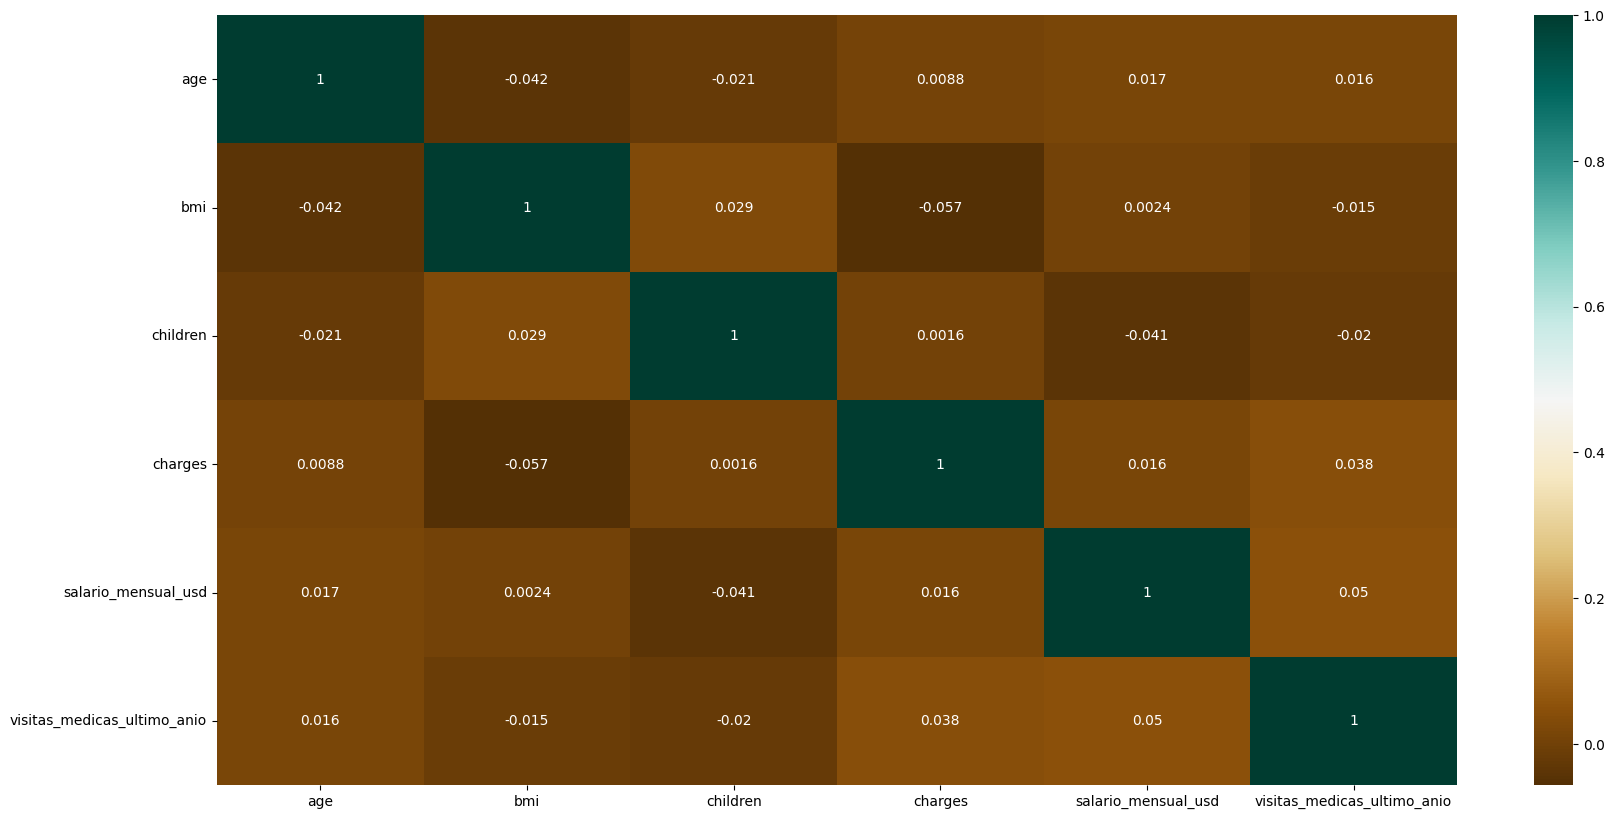

In [ ]:
plt.figure(figsize=(20,10))
# Select only numeric columns for correlation
numeric_data = datos_limpios.select_dtypes(include=['float64', 'int64'])
c = numeric_data.corr()
sns.heatmap(c, cmap="BrBG", annot=True)

## Creacion Variables Derivadas

In [ ]:
### Categorizamos la edad

bins = [0, 12, 18, 30, 60, float('inf')]
labels = ['Niño', 'Adolescente', 'Adulto Joven', 'Adulto', 'Adulto mayor']
datos_limpios['categoria_edad'] = pd.cut(datos_limpios['age'], bins=bins, labels=labels, right=False)

#Categorizamos BMI
bins = [0, 18.5, 24.9, 29.9,float('inf')]
labels = ['Bajo peso', 'Peso normal', 'Sobrepeso', 'Obesidad']
datos_limpios['categoria_bmi'] = pd.cut(datos_limpios['bmi'], bins=bins, labels=labels, right=False)

#anualizamos un salario
datos_limpios['salario_anual_usd'] = datos_limpios['salario_mensual_usd'] * 12

# Salario disponible por persona considerando hijos (suponiendo que lo mantiene el padre)

datos_limpios['salario_disponible_por_persona'] = datos_limpios['salario_mensual_usd'] / (1 + datos_limpios['children'])
datos_limpios['salario_disponible_por_persona_anual'] = datos_limpios['salario_anual_usd'] / (1 + datos_limpios['children'])

## Edad al cuadrado
datos_limpios['age_squared'] = datos_limpios['age'] ** 2

## Log-charges
datos_limpios['log_charges'] = np.log(datos_limpios['charges'])

## Log-bmi
datos_limpios['log_bmi'] = np.log(datos_limpios['bmi'])

## Log-salario anual
datos_limpios['log_salario_anual'] = np.log(datos_limpios['salario_anual_usd'])

## Interaccion entre BMI y edad

datos_limpios['bmi_x_age'] = datos_limpios['bmi'] * datos_limpios['age']

## Ponderaremos el BMI por nivel de tabaquismo

datos_limpios['bmi_x_smoker'] = datos_limpios['bmi'] * datos_limpios['smoker'].map({'no': 0, 'yes': 1, 'sometimes': 0.5})

## los fumadores van mas o menos al medico?

datos_limpios['smoker_x_visitas'] = datos_limpios['smoker'].map({'no': 0, 'yes': 1, 'sometimes': 0.5}) * datos_limpios['visitas_medicas_ultimo_anio']

##
datos_limpios['charges_over_income'] = datos_limpios['charges'] / datos_limpios['salario_anual_usd']
datos_limpios['visitas_per_child'] = datos_limpios['visitas_medicas_ultimo_anio'] / (datos_limpios['children'] + 1)
datos_limpios['salario_por_bmi'] = datos_limpios['salario_anual_usd'] / datos_limpios['bmi']



In [ ]:
datos_limpios.to_csv("base_limpia.csv", index=False)

In [ ]:
datos_limpios

,age,sex,bmi,children,smoker,region,charges,nivel_socioeconomico,salario_mensual_usd,nivel_educativo,...,age_squared,log_charges,log_bmi,log_salario_anual,bmi_x_age,bmi_x_smoker,smoker_x_visitas,charges_over_income,visitas_per_child,salario_por_bmi
0,32.0,female,22.047802,4,no,northwest,12901.596230,bajo,3903.133182,preparatoria,...,1024.0,9.465106,3.093213,10.754442,705.529654,0.000000,0.0,0.275454,0.200000,2124.365904
1,89.0,female,28.993167,1,no,northwest,11134.706660,medio,3948.696113,secundaria,...,7921.0,9.317822,3.367060,10.766047,2580.391839,0.000000,0.0,0.234987,1.000000,1634.328316
2,78.0,female,37.285143,1,sometimes,northwest,7574.292284,bajo,2957.630834,primaria,...,6084.0,8.932515,3.618595,10.477050,2908.241180,18.642572,1.5,0.213411,1.500000,951.895764
3,38.0,male,28.511725,2,no,southeast,12234.581330,bajo,6114.139944,universidad,...,1444.0,9.412022,3.350315,11.203266,1083.445535,0.000000,0.0,0.166753,0.333333,2573.316078
4,41.0,female,35.850807,2,yes,northeast,15086.646510,alto,5560.738957,preparatoria,...,1681.0,9.621565,3.579366,11.108393,1469.883092,35.850807,2.0,0.226089,0.666667,1861.293310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,27.0,female,23.322408,0,no,southwest,14009.435970,medio,2230.192479,primaria,...,729.0,9.547486,3.149415,10.194750,629.705004,0.000000,0.0,0.523476,2.000000,1147.493443
1485,75.0,male,27.514099,0,no,northeast,18200.133600,bajo,4938.217582,secundaria,...,5625.0,9.809184,3.314699,10.989666,2063.557397,0.000000,0.0,0.307131,3.000000,2153.754400
1486,22.0,male,23.507978,2,yes,southwest,12393.456640,bajo,4168.477540,primaria,...,484.0,9.424924,3.157340,10.820213,517.175525,23.507978,3.0,0.247761,1.000000,2127.861850
1487,82.0,female,29.676648,1,no,northwest,17640.360030,bajo,3953.165562,universidad,...,6724.0,9.777945,3.390360,10.767179,2433.485139,0.000000,0.0,0.371861,0.500000,1598.495446


## 2. Estadisticas descriptivas por variable.

<Axes: >

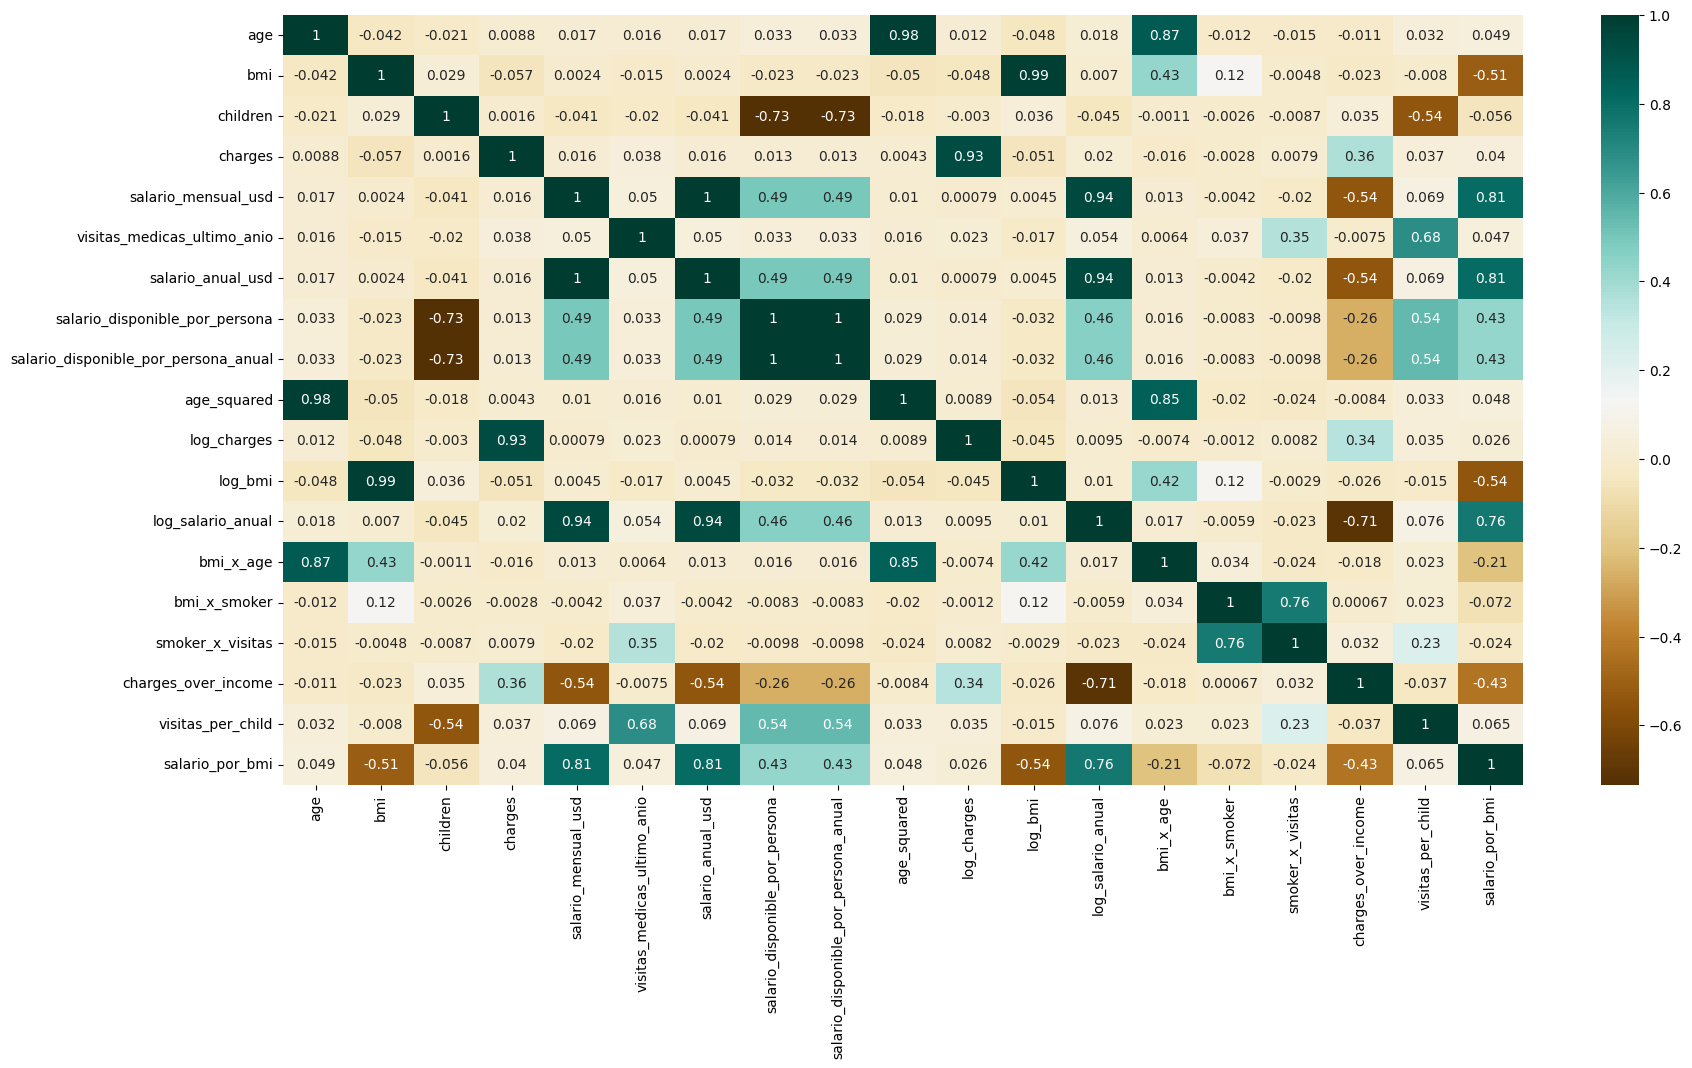

In [ ]:
plt.figure(figsize=(20,10))
# Select only numeric columns for correlation
numeric_data = datos_limpios.select_dtypes(include=['float64', 'int64'])
c = numeric_data.corr()
sns.heatmap(c, cmap="BrBG", annot=True)

### EDAD

In [ ]:
datos_limpios['age'].describe()

count    1403.000000
mean       52.684248
std        20.876328
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

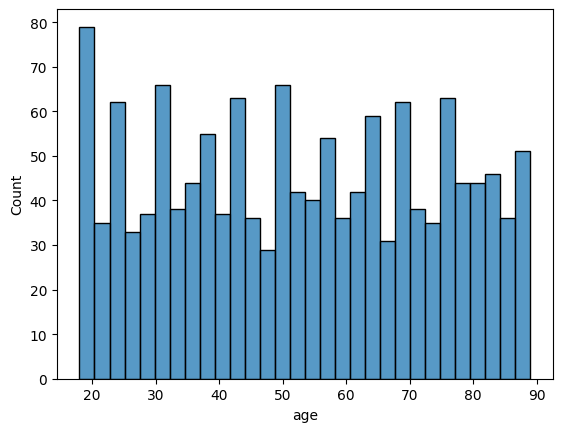

In [ ]:
sns.histplot(datos_limpios['age'], bins=30, kde=False)



<Axes: xlabel='age'>

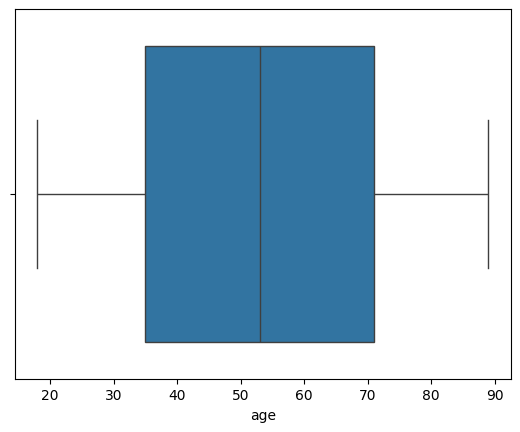

In [ ]:
sns.boxplot(x=datos_limpios['age'])

In [ ]:
datos_limpios.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'nivel_socioeconomico', 'salario_mensual_usd', 'nivel_educativo',
       'tipo_empleo', 'visitas_medicas_ultimo_anio', 'charges_cat',
       'categoria_edad', 'categoria_bmi', 'salario_anual_usd',
       'salario_disponible_por_persona',
       'salario_disponible_por_persona_anual', 'age_squared', 'log_charges',
       'log_bmi', 'log_salario_anual', 'bmi_x_age', 'bmi_x_smoker',
       'smoker_x_visitas', 'charges_over_income', 'visitas_per_child',
       'salario_por_bmi'],
      dtype='object')

### SEX

In [ ]:
datos_limpios['sex'].describe()

count       1403
unique         2
top       female
freq         733
Name: sex, dtype: object

<Axes: xlabel='sex', ylabel='Count'>

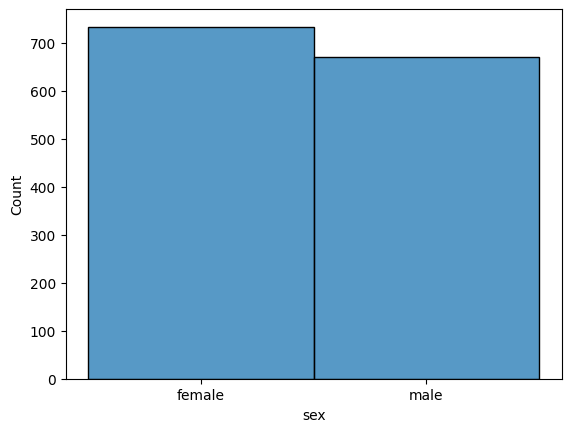

In [ ]:
sns.histplot(datos_limpios['sex'], bins=30, kde=False)

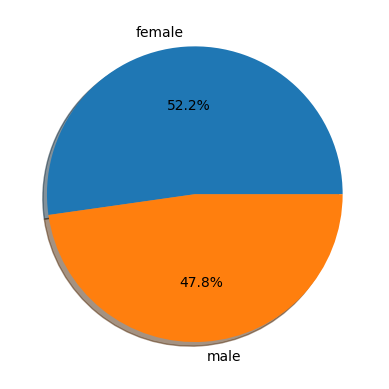

In [ ]:
label = datos_limpios.sex.value_counts().index
label_count = datos_limpios.sex.value_counts().values
plt.pie(data=datos_limpios, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

### BMI

<Axes: xlabel='bmi', ylabel='Count'>

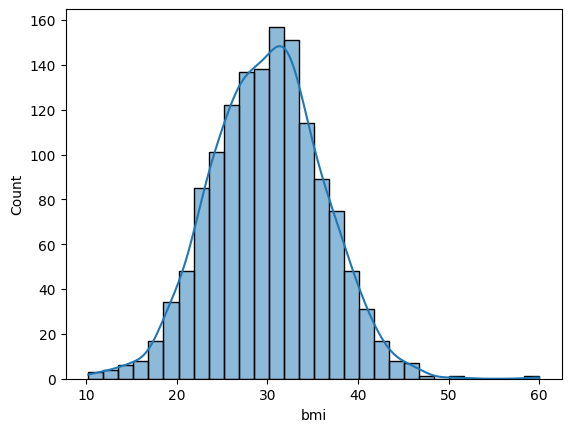

In [ ]:
sns.histplot(datos_limpios['bmi'], bins=30, kde=True)

<Axes: xlabel='bmi'>

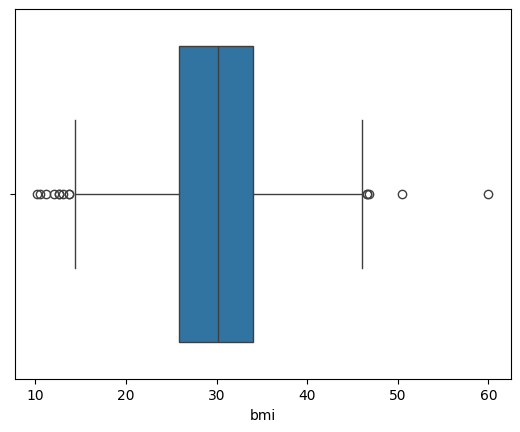

In [ ]:
sns.boxplot(x='bmi', data=datos_limpios)

### Smoker

In [ ]:
datos_limpios['smoker'].describe()

count     1403
unique       3
top         no
freq      1025
Name: smoker, dtype: object

<Axes: xlabel='smoker', ylabel='Count'>

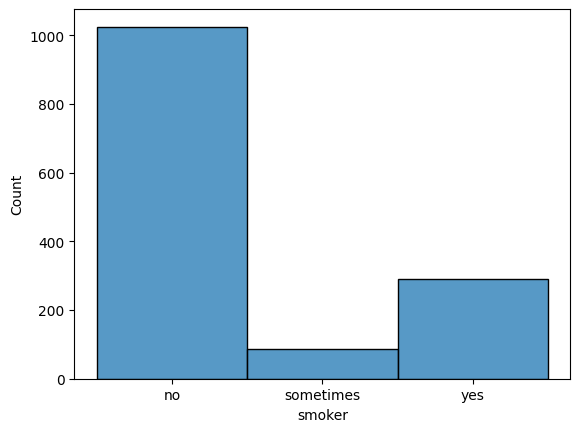

In [ ]:
sns.histplot(datos_limpios['smoker'], bins=30, kde=False)

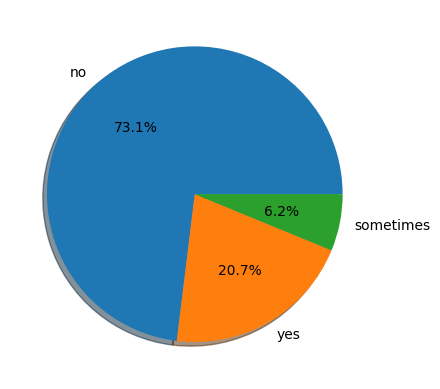

In [ ]:
label = datos_limpios.smoker.value_counts().index
label_count = datos_limpios.smoker.value_counts().values
plt.pie(data=datos_limpios, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

### Region

In [ ]:
datos_limpios['region'].describe()

count          1403
unique            5
top       southeast
freq            395
Name: region, dtype: object

<Axes: xlabel='region', ylabel='Count'>

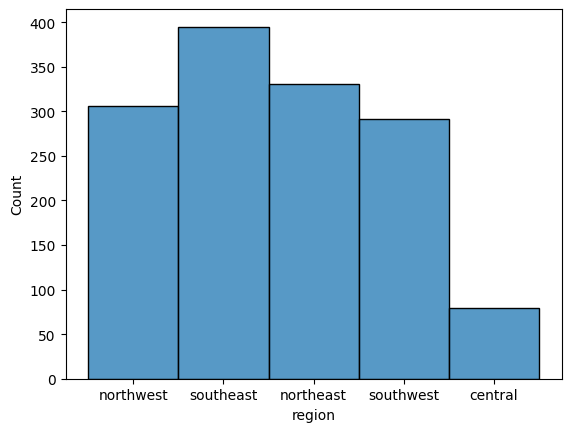

In [ ]:
sns.histplot(datos_limpios['region'], bins=30, kde=False)

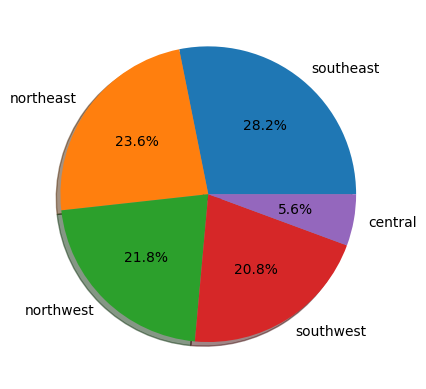

In [ ]:
label = datos_limpios.region.value_counts().index
label_count = datos_limpios.region.value_counts().values
plt.pie(data=datos_limpios, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

In [ ]:
datos_limpios.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'nivel_socioeconomico', 'salario_mensual_usd', 'nivel_educativo',
       'tipo_empleo', 'visitas_medicas_ultimo_anio', 'charges_cat',
       'categoria_edad', 'categoria_bmi', 'salario_anual_usd',
       'salario_disponible_por_persona',
       'salario_disponible_por_persona_anual', 'age_squared', 'log_charges',
       'log_bmi', 'log_salario_anual', 'bmi_x_age', 'bmi_x_smoker',
       'smoker_x_visitas', 'charges_over_income', 'visitas_per_child',
       'salario_por_bmi'],
      dtype='object')

### Charges

In [ ]:
datos_limpios['charges'].describe()

count     1403.000000
mean     13241.840333
std       4895.007491
min        249.868542
25%       9739.244856
50%      13194.472580
75%      16592.054605
max      29428.618570
Name: charges, dtype: float64

<Axes: xlabel='charges', ylabel='Count'>

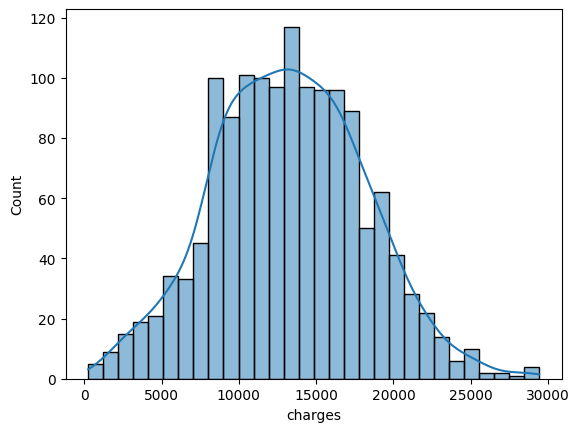

In [ ]:
sns.histplot(datos_limpios['charges'], bins=30, kde=True)

<Axes: xlabel='charges'>

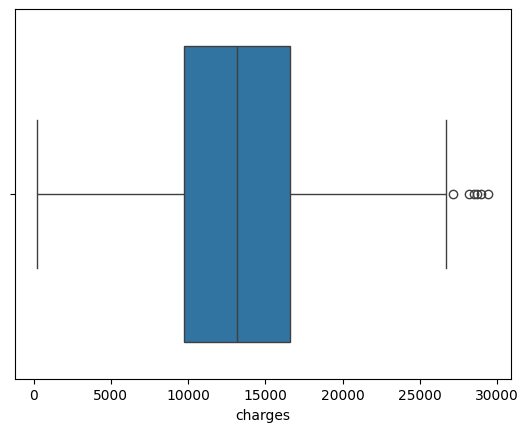

In [ ]:
sns.boxplot(x = 'charges', data = datos_limpios)

### Salario Mensual

In [ ]:
datos_limpios['salario_mensual_usd'].describe()

count    1403.000000
mean     4045.283016
std      1419.823500
min       224.154435
25%      3053.191896
50%      4045.094445
75%      5011.454974
max      7885.561713
Name: salario_mensual_usd, dtype: float64

<Axes: xlabel='salario_mensual_usd', ylabel='Count'>

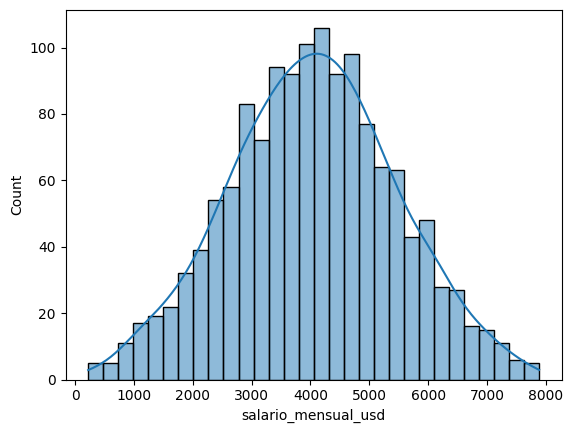

In [ ]:
sns.histplot(datos_limpios['salario_mensual_usd'], bins=30, kde=True)

<Axes: xlabel='salario_mensual_usd'>

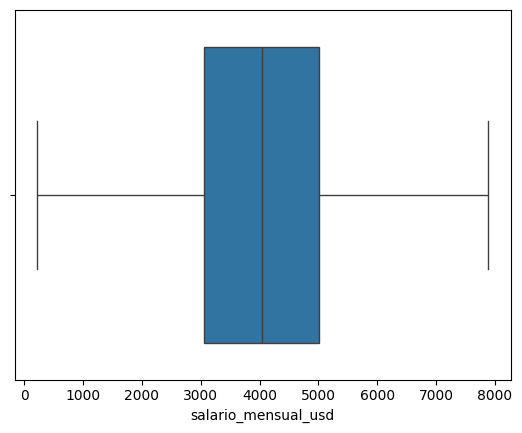

In [ ]:
sns.boxplot(x='salario_mensual_usd', data=datos_limpios)

### Tipo de Empleo

In [ ]:
datos_limpios['tipo_empleo'].describe()

count            1403
unique              5
top       desempleado
freq              459
Name: tipo_empleo, dtype: object

<Axes: xlabel='tipo_empleo', ylabel='Count'>

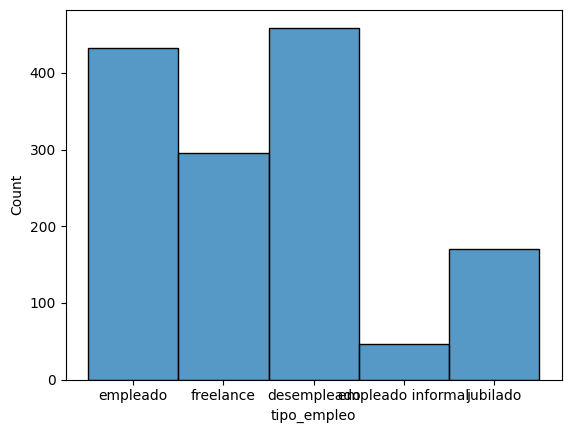

In [ ]:
sns.histplot(datos_limpios['tipo_empleo'], bins=6, kde=False)

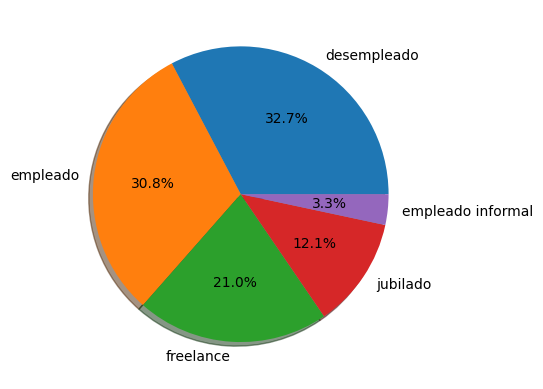

In [ ]:
label = datos_limpios.tipo_empleo.value_counts().index
label_count = datos_limpios.tipo_empleo.value_counts().values
plt.pie(data=datos_limpios, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

### Visitas medicas en el ultimo anio

In [ ]:
datos_limpios['visitas_medicas_ultimo_anio'].describe()

count    1403.000000
mean        1.959373
std         1.386372
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: visitas_medicas_ultimo_anio, dtype: float64

<Axes: xlabel='visitas_medicas_ultimo_anio', ylabel='Count'>

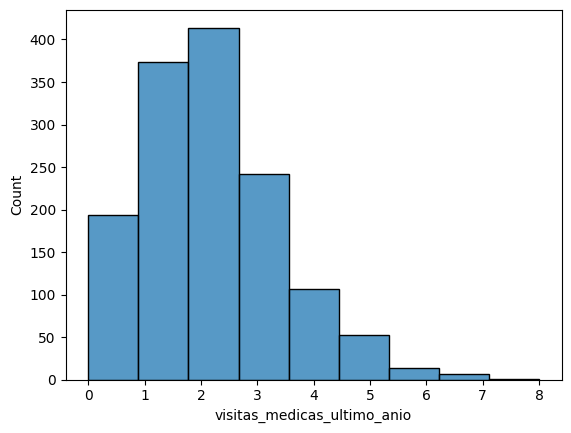

In [ ]:
sns.histplot(datos_limpios['visitas_medicas_ultimo_anio'], bins=9, kde=False)

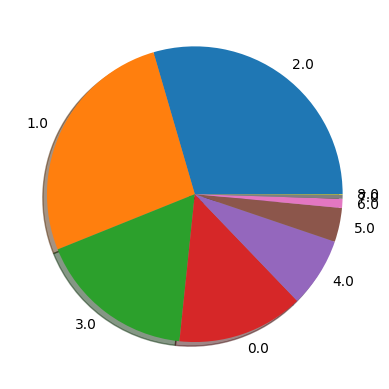

In [ ]:
label = datos_limpios.visitas_medicas_ultimo_anio.value_counts().index
label_count = datos_limpios.visitas_medicas_ultimo_anio.value_counts().values
plt.pie(data=datos_limpios, x=label_count, labels=label, shadow=True, radius=1)
plt.show()

<Axes: xlabel='visitas_medicas_ultimo_anio'>

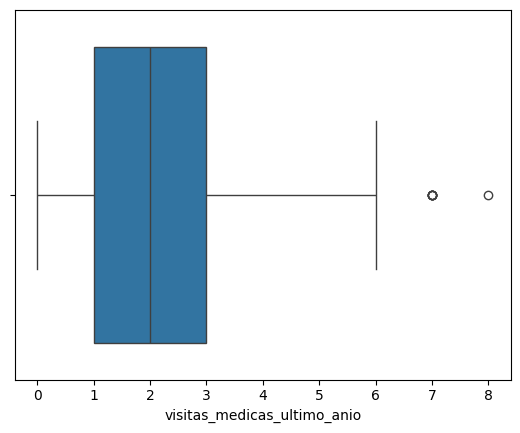

In [ ]:
sns.boxplot(x='visitas_medicas_ultimo_anio', data=datos_limpios)

<h2 class="subtitulo">3. Codificaciones de variables categóricas</h2>


<h3 class="encabezado-seccion">Transformamos las variables categóricas en variables dummy para dejar todo listo para el modelo.</h3>

In [ ]:
print(datos_limpios['charges_cat'].value_counts())


charges_cat
bajo     468
alto     468
medio    467
Name: count, dtype: int64


In [ ]:
datos_disc = datos_limpios.copy()
datos_disc

,age,sex,bmi,children,smoker,region,charges,nivel_socioeconomico,salario_mensual_usd,nivel_educativo,...,age_squared,log_charges,log_bmi,log_salario_anual,bmi_x_age,bmi_x_smoker,smoker_x_visitas,charges_over_income,visitas_per_child,salario_por_bmi
0,32.0,female,22.047802,4,no,northwest,12901.596230,bajo,3903.133182,preparatoria,...,1024.0,9.465106,3.093213,10.754442,705.529654,0.000000,0.0,0.275454,0.200000,2124.365904
1,89.0,female,28.993167,1,no,northwest,11134.706660,medio,3948.696113,secundaria,...,7921.0,9.317822,3.367060,10.766047,2580.391839,0.000000,0.0,0.234987,1.000000,1634.328316
2,78.0,female,37.285143,1,sometimes,northwest,7574.292284,bajo,2957.630834,primaria,...,6084.0,8.932515,3.618595,10.477050,2908.241180,18.642572,1.5,0.213411,1.500000,951.895764
3,38.0,male,28.511725,2,no,southeast,12234.581330,bajo,6114.139944,universidad,...,1444.0,9.412022,3.350315,11.203266,1083.445535,0.000000,0.0,0.166753,0.333333,2573.316078
4,41.0,female,35.850807,2,yes,northeast,15086.646510,alto,5560.738957,preparatoria,...,1681.0,9.621565,3.579366,11.108393,1469.883092,35.850807,2.0,0.226089,0.666667,1861.293310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,27.0,female,23.322408,0,no,southwest,14009.435970,medio,2230.192479,primaria,...,729.0,9.547486,3.149415,10.194750,629.705004,0.000000,0.0,0.523476,2.000000,1147.493443
1485,75.0,male,27.514099,0,no,northeast,18200.133600,bajo,4938.217582,secundaria,...,5625.0,9.809184,3.314699,10.989666,2063.557397,0.000000,0.0,0.307131,3.000000,2153.754400
1486,22.0,male,23.507978,2,yes,southwest,12393.456640,bajo,4168.477540,primaria,...,484.0,9.424924,3.157340,10.820213,517.175525,23.507978,3.0,0.247761,1.000000,2127.861850
1487,82.0,female,29.676648,1,no,northwest,17640.360030,bajo,3953.165562,universidad,...,6724.0,9.777945,3.390360,10.767179,2433.485139,0.000000,0.0,0.371861,0.500000,1598.495446


In [ ]:
scaler = MinMaxScaler()
col_float = ['age', 'bmi', 'charges', 'salario_mensual_usd', 'visitas_medicas_ultimo_anio','children']

for col in col_float:
    datos_disc[col] = scaler.fit_transform(datos_disc[[col]])

datos_disc.head()

,age,sex,bmi,children,smoker,region,charges,nivel_socioeconomico,salario_mensual_usd,nivel_educativo,...,age_squared,log_charges,log_bmi,log_salario_anual,bmi_x_age,bmi_x_smoker,smoker_x_visitas,charges_over_income,visitas_per_child,salario_por_bmi
0,0.197183,female,0.237563,0.8,no,northwest,0.433594,bajo,0.480196,preparatoria,...,1024.0,9.465106,3.093213,10.754442,705.529654,0.000000,0.0,0.275454,0.200000,2124.365904
1,1.000000,female,0.377092,0.2,no,northwest,0.373040,medio,0.486143,secundaria,...,7921.0,9.317822,3.367060,10.766047,2580.391839,0.000000,0.0,0.234987,1.000000,1634.328316
2,0.845070,female,0.543672,0.2,sometimes,northwest,0.251019,bajo,0.356785,primaria,...,6084.0,8.932515,3.618595,10.477050,2908.241180,18.642572,1.5,0.213411,1.500000,951.895764
3,0.281690,male,0.367420,0.4,no,southeast,0.410734,bajo,0.768786,universidad,...,1444.0,9.412022,3.350315,11.203266,1083.445535,0.000000,0.0,0.166753,0.333333,2573.316078
4,0.323944,female,0.514857,0.4,yes,northeast,0.508479,alto,0.696554,preparatoria,...,1681.0,9.621565,3.579366,11.108393,1469.883092,35.850807,2.0,0.226089,0.666667,1861.293310


In [ ]:
datos_disc["age"].value_counts()

age
0.859155    31
0.014085    29
0.704225    29
0.352113    29
0.450704    28
            ..
0.718310    14
0.845070    13
0.366197    13
0.295775    13
0.422535    10
Name: count, Length: 72, dtype: int64

In [ ]:
datos_disc.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'nivel_socioeconomico', 'salario_mensual_usd', 'nivel_educativo',
       'tipo_empleo', 'visitas_medicas_ultimo_anio', 'charges_cat',
       'categoria_edad', 'categoria_bmi', 'salario_anual_usd',
       'salario_disponible_por_persona',
       'salario_disponible_por_persona_anual', 'age_squared', 'log_charges',
       'log_bmi', 'log_salario_anual', 'bmi_x_age', 'bmi_x_smoker',
       'smoker_x_visitas', 'charges_over_income', 'visitas_per_child',
       'salario_por_bmi'],
      dtype='object')

In [ ]:
datos_disc = pd.get_dummies(datos_disc, prefix='smoker', columns=['smoker'], drop_first=False,dtype=int)
datos_disc = pd.get_dummies(datos_disc, prefix='sex', columns=['sex'], drop_first=False,dtype=int)
datos_disc = pd.get_dummies(datos_disc, prefix='region', columns=['region'], drop_first=False,dtype=int)
datos_disc = pd.get_dummies(datos_disc, prefix='tipo_empleo', columns=['tipo_empleo'], drop_first=False,dtype=int)
datos_disc = pd.get_dummies(datos_disc, prefix='nivel_socioeconomico', columns=['nivel_socioeconomico'], drop_first=False,dtype=int)
datos_disc = pd.get_dummies(datos_disc, prefix='nivel_educativo', columns=['nivel_educativo'], drop_first=False,dtype=int)


datos_disc.head()

datos_disc_copia = datos_disc.copy()

In [ ]:
datos_disc = datos_disc.drop(['charges_cat'], axis=1, inplace=False)

In [ ]:
datos_disc.columns

Index(['age', 'bmi', 'children', 'charges', 'salario_mensual_usd',
       'visitas_medicas_ultimo_anio', 'categoria_edad', 'categoria_bmi',
       'salario_anual_usd', 'salario_disponible_por_persona',
       'salario_disponible_por_persona_anual', 'age_squared', 'log_charges',
       'log_bmi', 'log_salario_anual', 'bmi_x_age', 'bmi_x_smoker',
       'smoker_x_visitas', 'charges_over_income', 'visitas_per_child',
       'salario_por_bmi', 'smoker_no', 'smoker_sometimes', 'smoker_yes',
       'sex_female', 'sex_male', 'region_central', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'tipo_empleo_desempleado', 'tipo_empleo_empleado',
       'tipo_empleo_empleado informal', 'tipo_empleo_freelance',
       'tipo_empleo_jubilado', 'nivel_socioeconomico_alto',
       'nivel_socioeconomico_bajo', 'nivel_socioeconomico_medio',
       'nivel_educativo_posgrado', 'nivel_educativo_preparatoria',
       'nivel_educativo_primaria', 'nivel_educativo_sec

<h3 class="encabezado-seccion">Definimos X & Y, dividimos en entrenamiento y prueba, así como la importación del árbol de decisión y las métricas básicas de matriz de confusión y exactitud.</h3>

In [ ]:
feed = datos_disc[['visitas_medicas_ultimo_anio',
    'tipo_empleo_desempleado', 'tipo_empleo_empleado',
    'tipo_empleo_empleado informal', 'tipo_empleo_freelance',
    'tipo_empleo_jubilado','charges']]

In [ ]:
df_train_x = feed.drop('charges',axis = 1)
df_train_y = feed['charges']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
kn_y_pred = kn.predict(x_test)
kn_cm = confusion_matrix(y_test,kn_y_pred)
kn_accuracy = accuracy_score(y_test,kn_y_pred)
print("confusion matrics=",kn_cm)
print("  ")
print("accuracy=",kn_accuracy)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_test)
rf_cm = confusion_matrix(y_test,rf_y_pred)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("confusion matrics=",rf_cm)
print("  ")
print("accuracy=",rf_accuracy)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
datos_disc

,age,bmi,children,charges,salario_mensual_usd,visitas_medicas_ultimo_anio,categoria_edad,categoria_bmi,salario_anual_usd,salario_disponible_por_persona,...,tipo_empleo_freelance,tipo_empleo_jubilado,nivel_socioeconomico_alto,nivel_socioeconomico_bajo,nivel_socioeconomico_medio,nivel_educativo_posgrado,nivel_educativo_preparatoria,nivel_educativo_primaria,nivel_educativo_secundaria,nivel_educativo_universidad
0,0.197183,0.237563,0.8,0.433594,0.480196,0.125,Adulto,Peso normal,46837.598184,780.626636,...,0,0,0,1,0,0,1,0,0,0
1,1.000000,0.377092,0.2,0.373040,0.486143,0.250,Adulto mayor,Sobrepeso,47384.353356,1974.348056,...,1,0,0,0,1,0,0,0,1,0
2,0.845070,0.543672,0.2,0.251019,0.356785,0.375,Adulto mayor,Obesidad,35491.570008,1478.815417,...,1,0,0,1,0,0,0,1,0,0
3,0.281690,0.367420,0.4,0.410734,0.768786,0.125,Adulto,Sobrepeso,73369.679328,2038.046648,...,1,0,0,1,0,0,0,0,0,1
4,0.323944,0.514857,0.4,0.508479,0.696554,0.250,Adulto,Obesidad,66728.867484,1853.579652,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,0.281690,0.504487,0.2,0.351075,0.467188,0.500,Adulto,Obesidad,45641.632368,1901.734682,...,0,0,1,0,0,0,1,0,0,0
1419,0.802817,0.347378,0.0,0.615183,0.615300,0.375,Adulto mayor,Sobrepeso,59258.610984,4938.217582,...,1,0,0,1,0,0,0,0,1,0
1420,0.056338,0.266898,0.4,0.416179,0.514830,0.375,Adulto Joven,Peso normal,50021.730480,1389.492513,...,0,0,0,1,0,0,0,1,0,0
1421,0.901408,0.390822,0.2,0.595999,0.486727,0.125,Adulto mayor,Sobrepeso,47437.986744,1976.582781,...,0,0,0,1,0,0,0,0,0,1


# Comparacion con modelos de regresion lineal o arboles/forests

## Regresion lineal

In [ ]:
datos_limpios.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'nivel_socioeconomico', 'salario_mensual_usd', 'nivel_educativo',
       'tipo_empleo', 'visitas_medicas_ultimo_anio', 'charges_cat',
       'categoria_edad', 'categoria_bmi', 'salario_anual_usd',
       'salario_disponible_por_persona',
       'salario_disponible_por_persona_anual', 'age_squared', 'log_charges',
       'log_bmi', 'log_salario_anual', 'bmi_x_age', 'bmi_x_smoker',
       'smoker_x_visitas', 'charges_over_income', 'visitas_per_child',
       'salario_por_bmi'],
      dtype='object')

In [ ]:
datos_limpios = datos_limpios.dropna(inplace=True)

In [ ]:
datos_limpios

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

datos_disc_copia = datos_limpios.drop(['charges_cat'], axis=1, inplace=False)

feed = datos_disc_copia[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'nivel_socioeconomico', 'salario_mensual_usd', 'nivel_educativo',
       'tipo_empleo', 'visitas_medicas_ultimo_anio',
       'categoria_edad', 'categoria_bmi', 'salario_anual_usd',
       'salario_disponible_por_persona',
       'salario_disponible_por_persona_anual', 'age_squared', 'log_charges',
       'log_bmi', 'log_salario_anual', 'bmi_x_age', 'bmi_x_smoker',
       'smoker_x_visitas', 'charges_over_income', 'visitas_per_child',
       'salario_por_bmi']]
df_train_x = feed.drop('charges', axis=1)
df_train_y = feed['charges']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

AttributeError: 'NoneType' object has no attribute 'drop'

In [ ]:
modelo_lr = LinearRegression()
modelo_lr.fit(x_train, y_train)

y_pred_lr = modelo_lr.predict(x_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresion lineal - RMSE:", rmse_lr)
print("Regresion lineal - R²:", r2_lr)

ValueError: Input contains NaN

In [ ]:
import statsmodels.api as sm

# 1. Agregar constante (intercepto)
x_train_const = sm.add_constant(x_train)

# 2. Ajustar modelo OLS (mínimos cuadrados ordinarios)
modelo_sm = sm.OLS(y_train, x_train_const).fit()

# 3. Ver resumen del modelo
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.305
Date:                Tue, 06 May 2025   Prob (F-statistic):              0.259
Time:                        23:04:29   Log-Likelihood:                 370.79
No. Observations:                1002   AIC:                            -729.6
Df Residuals:                     996   BIC:                            -700.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Agregar constante
x_train_const = sm.add_constant(x_train)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_const.values, i)
                   for i in range(x_train_const.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))

                        Variable       VIF
2        tipo_empleo_desempleado       inf
4  tipo_empleo_empleado informal       inf
3           tipo_empleo_empleado       inf
5          tipo_empleo_freelance       inf
6           tipo_empleo_jubilado       inf
1    visitas_medicas_ultimo_anio  1.001175
0                          const  0.000000


C:\Users\chopp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\chopp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## Modelo Ridge

In [ ]:
modelo_ridge = Ridge(alpha=1.0)
modelo_ridge.fit(x_train, y_train)

y_pred_ridge = modelo_ridge.predict(x_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Modelo Ridge RMSE:", rmse_ridge)
print("Modelo Ridge R²:", r2_ridge)

Modelo Ridge RMSE: 0.1628408741731396
Modelo Ridge R²: 0.01517327427455939


## Arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeRegressor

modelo_dt = DecisionTreeRegressor(random_state=1)
modelo_dt.fit(x_train, y_train)

y_pred_dt = modelo_dt.predict(x_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Arbol de decision RMSE:", rmse_dt)
print("Arbol de decision R²:", r2_dt)

Arbol de decision RMSE: 0.166326100557952
Arbol de decision R²: -0.02743365396458053


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(random_state=1)
modelo_rf.fit(x_train, y_train)

y_pred_rf = modelo_rf.predict(x_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)

Random Forest RMSE: 0.1659048196700979
Random Forest R²: -0.022235552150606797
